<h2> Analysis and Visualisation </h2>

<h3> Setting up the notebook: </h3>

Importing the necessary files and libraries.

In [2]:
import pandas as pd 
import numpy as np 
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from matplotlib import pyplot
import missingno as msno
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [3]:
df = pd.read_csv('loan_payments_versions/loan_payments_post_null_imputation.csv', index_col='id')
transformed_df = pd.read_csv('loan_payments_versions/loan_payments_transformed.csv', index_col='id')

In [4]:
#convert the string to date for issue date and last payment date
df['issue_date'] = pd.to_datetime(df['issue_date'].astype(str).str.strip(), errors='coerce').dt.to_period('M')
df['last_payment_date'] = pd.to_datetime(df['last_payment_date'].astype(str).str.strip(), errors='coerce').dt.to_period('M')

transformed_df['issue_date'] = pd.to_datetime(transformed_df['issue_date'].astype(str).str.strip(), errors='coerce').dt.to_period('M')
transformed_df['last_payment_date'] = pd.to_datetime(transformed_df['last_payment_date'].astype(str).str.strip(), errors='coerce').dt.to_period('M')


<h3>Foundational Data Exploration </h3>

In order to get a high level snapshot of the data, we'll be conducting the foundational data exploration.

Here, we'll perform a preliminary exploration of the dataset to get a basic understanding of its structure and contents

In [5]:
df.describe()

,member_id,loan_amount,funded_amount,funded_amount_inv,int_rate,instalment,annual_inc,dti,delinq_2yrs,inq_last_6mths,...,total_payment,total_payment_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_payment_amount,collections_12_mths_ex_med,policy_code
count,5.410000e+04,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,5.410000e+04,54100.000000,54100.000000,54100.000000,...,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,54100.000000,54100.0
mean,8.666729e+06,13344.744917,13241.287886,12969.422769,13.509089,400.331111,7.222286e+04,15.877231,0.241386,0.891922,...,12099.322396,11813.597781,9423.503581,2582.719067,0.897099,92.202658,10.788851,3137.371503,0.004196,1.0
std,1.031359e+07,8081.004483,8022.426156,8094.090469,4.380006,238.886267,5.155488e+04,7.619923,0.704215,1.257632,...,8387.825058,8357.061608,6955.881319,2582.415330,6.198683,620.644544,119.963569,5328.015544,0.070913,0.0
min,7.472400e+04,500.000000,500.000000,0.000000,4.558080,15.670000,3.300000e+03,0.000000,0.000000,0.000000,...,33.730000,0.000000,0.000000,6.220000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,9.608008e+05,7000.000000,7000.000000,6775.000000,10.370000,224.660000,4.500000e+04,10.220000,0.000000,0.000000,...,5916.007390,5689.277500,4281.775000,892.677500,0.000000,0.000000,0.000000,290.967500,0.000000,1.0
50%,8.710748e+06,12000.000000,11972.076180,11325.000000,13.110000,347.160000,6.105250e+04,15.605000,0.000000,0.000000,...,10130.703339,9855.775000,7672.150000,1739.230000,0.000000,0.000000,0.000000,564.260000,0.000000,1.0
75%,1.052776e+07,18075.000000,18000.000000,18000.000000,16.200000,528.000000,8.600000e+04,21.270000,0.000000,1.000000,...,16289.777500,15998.680000,12549.777500,3327.552500,0.000000,0.000000,0.000000,3753.712500,0.000000,1.0
max,4.146185e+07,35000.000000,38747.500593,35000.000000,28.339564,1407.010000,2.039784e+06,39.910000,18.000000,33.000000,...,55758.222084,55061.000000,35000.020000,23062.450000,358.680000,27750.000000,7002.190000,36115.200000,4.000000,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54100 entries, 38676116 to 142608
Data columns (total 38 columns):
 #   Column                      Non-Null Count  Dtype    
---  ------                      --------------  -----    
 0   member_id                   54100 non-null  int64    
 1   loan_amount                 54100 non-null  int64    
 2   funded_amount               54100 non-null  float64  
 3   funded_amount_inv           54100 non-null  float64  
 4   term                        54100 non-null  object   
 5   int_rate                    54100 non-null  float64  
 6   instalment                  54100 non-null  float64  
 7   grade                       54100 non-null  object   
 8   sub_grade                   54100 non-null  object   
 9   employment_length           54100 non-null  object   
 10  home_ownership              54100 non-null  object   
 11  annual_inc                  54100 non-null  float64  
 12  verification_status         54100 non-null  object   
 13

<h4> Analyzing Key Numerical Features </h4>

In this part, we will create visualizations to understand the distribution of key numerical variables in our dataset. We will use histograms to visualize the distributions of loan_amount, int_rate, annual_inc, and dti to check for skewness and spread.

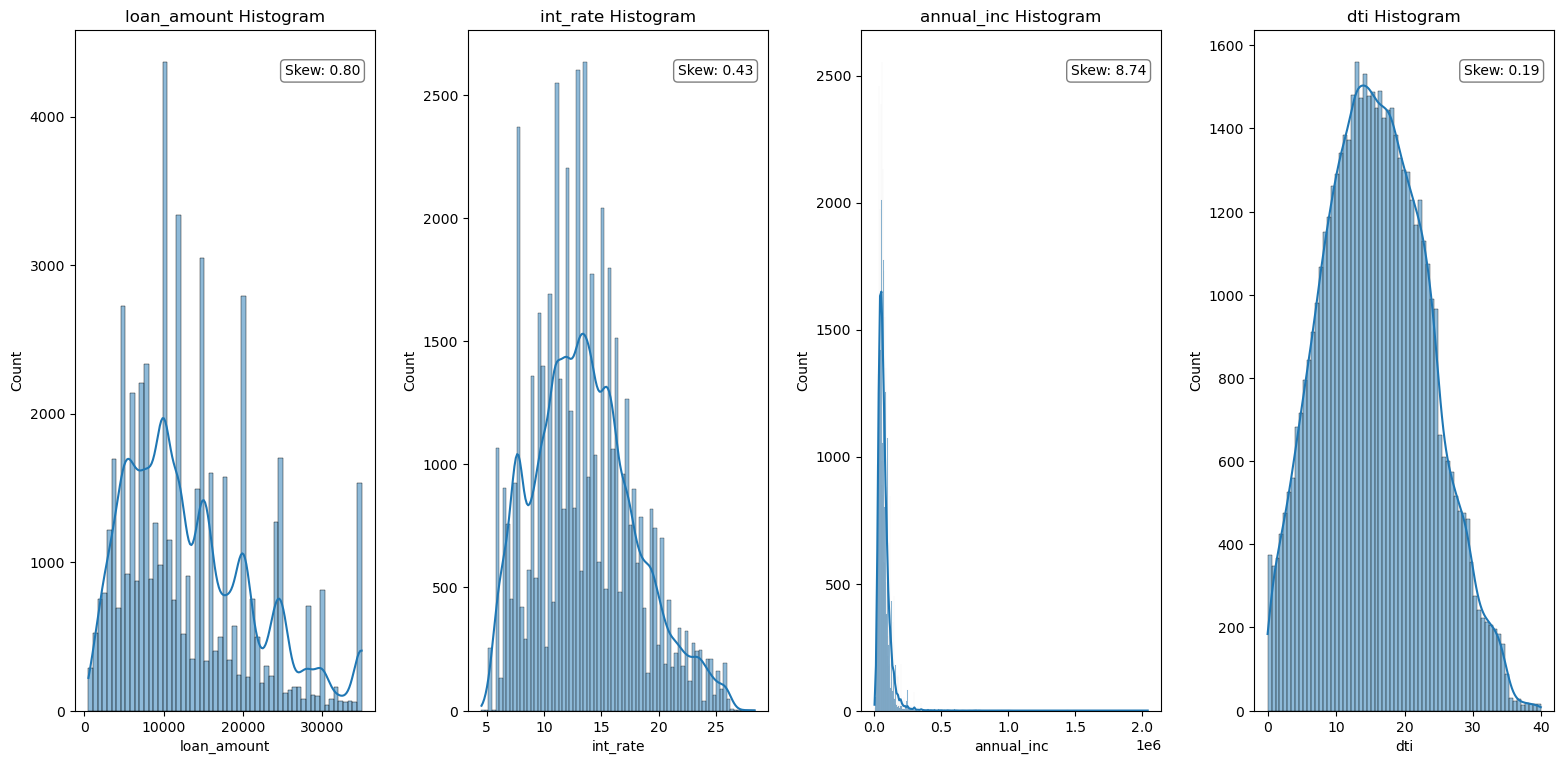

In [7]:
columns = ['loan_amount','int_rate','annual_inc','dti']
fig, axes = pyplot.subplots(nrows=1, ncols=4, figsize=(16, 8))
for i, transform_name in enumerate(columns):
    sns.histplot(df[transform_name], kde=True, ax=axes[i])
    axes[i].set_title(f'{transform_name} Histogram')
        
    skewness = df[transform_name].skew()
    axes[i].text(0.95, 0.95, f'Skew: {skewness:.2f}', 
                    ha='right', va='top', transform=axes[i].transAxes,
                    bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))

fig.tight_layout(pad=2.0)
pyplot.show()

<h4> Analyzing Categorical Columns </h4>

This section focuses on understanding the relationship between different categorical features and the loan status. We'll use bar charts and pie charts to visualize the distribution of loan statuses across different categories like purpose of the loan and the employment_length of the borrower. This will help us identify which categories are more likely to be associated with good or bad loans.

In [8]:
#categorical data analysis 
cat_cols = df.select_dtypes(include='object').columns.tolist()

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())
    print("-" * (len(col) + 6))



--- term ---
term
36 months    40501
60 months    13599
Name: count, dtype: int64
----------

--- grade ---
grade
B    16341
C    13566
A     9802
D     8132
E     4056
F     1688
G      515
Name: count, dtype: int64
-----------

--- sub_grade ---
sub_grade
B3    3636
B4    3536
B2    3236
C1    3013
B5    3007
C2    2950
B1    2926
C3    2786
A5    2786
A4    2642
C4    2505
C5    2312
D1    1832
D2    1805
A3    1749
D3    1641
D4    1505
A2    1475
D5    1349
A1    1150
E1     986
E2     979
E3     816
E4     654
E5     621
F1     485
F2     390
F3     325
F4     284
F5     204
G1     154
G2     130
G3      86
G4      74
G5      71
Name: count, dtype: int64
---------------

--- employment_length ---
employment_length
10+ years    18008
2 years       5050
< 1 year      5010
3 years       4579
5 years       3826
1 year        3687
4 years       3473
6 years       3049
7 years       2960
8 years       2532
9 years       1926
Name: count, dtype: int64
-----------------------

--- home_

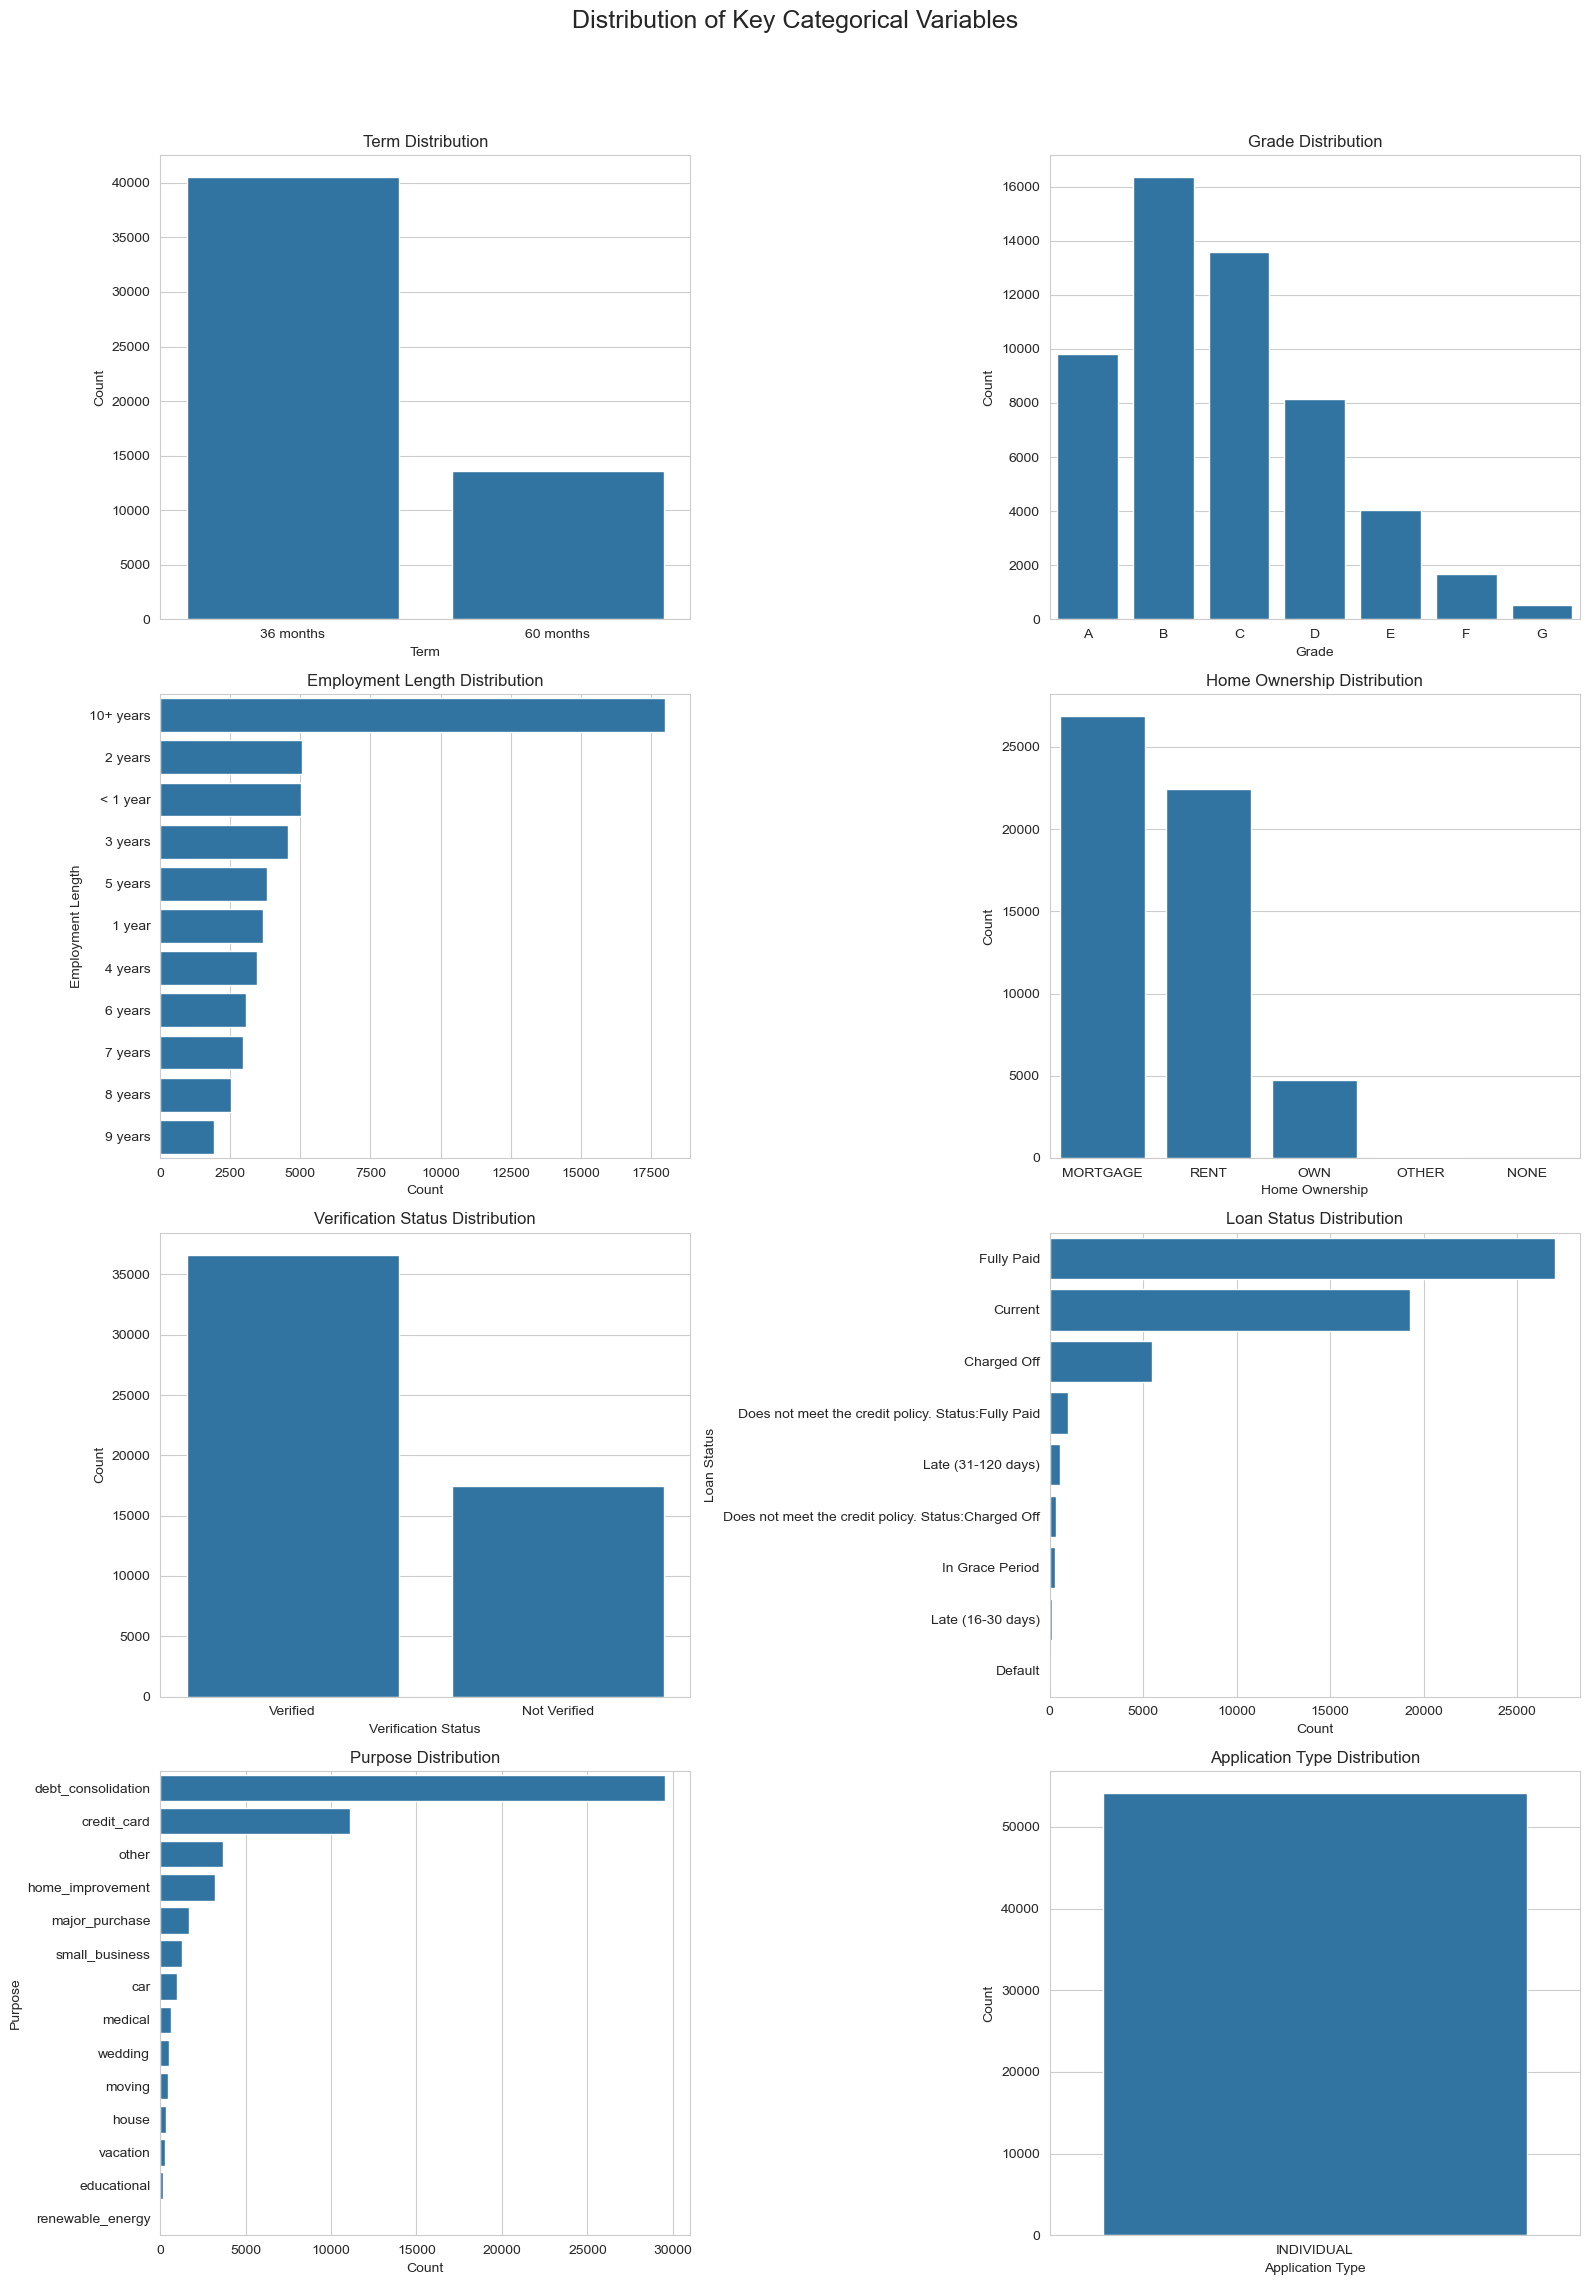

In [9]:
columns_to_plot = ['term', 'grade', 'employment_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'application_type']

sns.set_style("whitegrid")
fig, axes = pyplot.subplots(4, 2, figsize=(16, 24))
fig.suptitle('Distribution of Key Categorical Variables', fontsize=18)
    
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    title = f'{col.replace("_", " ").title()} Distribution'
      
    if col in ['loan_status', 'purpose', 'employment_length']:
        order = df[col].value_counts().index
        sns.countplot(y=df[col], ax=ax, order=order)
        ax.set_xlabel('Count')
        ax.set_ylabel(col.replace('_', ' ').title())
    else:
        if col == 'grade':
            order = sorted(df[col].unique())
        else:
            order = df[col].value_counts().index
        sns.countplot(x=df[col], ax=ax, order=order)
        ax.set_xlabel(col.replace('_', ' ').title())
        ax.set_ylabel('Count')
        
    ax.set_title(title)

pyplot.tight_layout(rect=[0, 0.03, 1, 0.95])
pyplot.show()

<h4> Correlation Analysis </h4>

Here, we'll investigate the relationships between different numerical variables in the dataset. We'll create a correlation matrix and visualize it as a heatmap to identify which variables are strongly correlated with each other

Text(0.5, 1.0, 'Hierarchically Clustered Correlation Matrix')

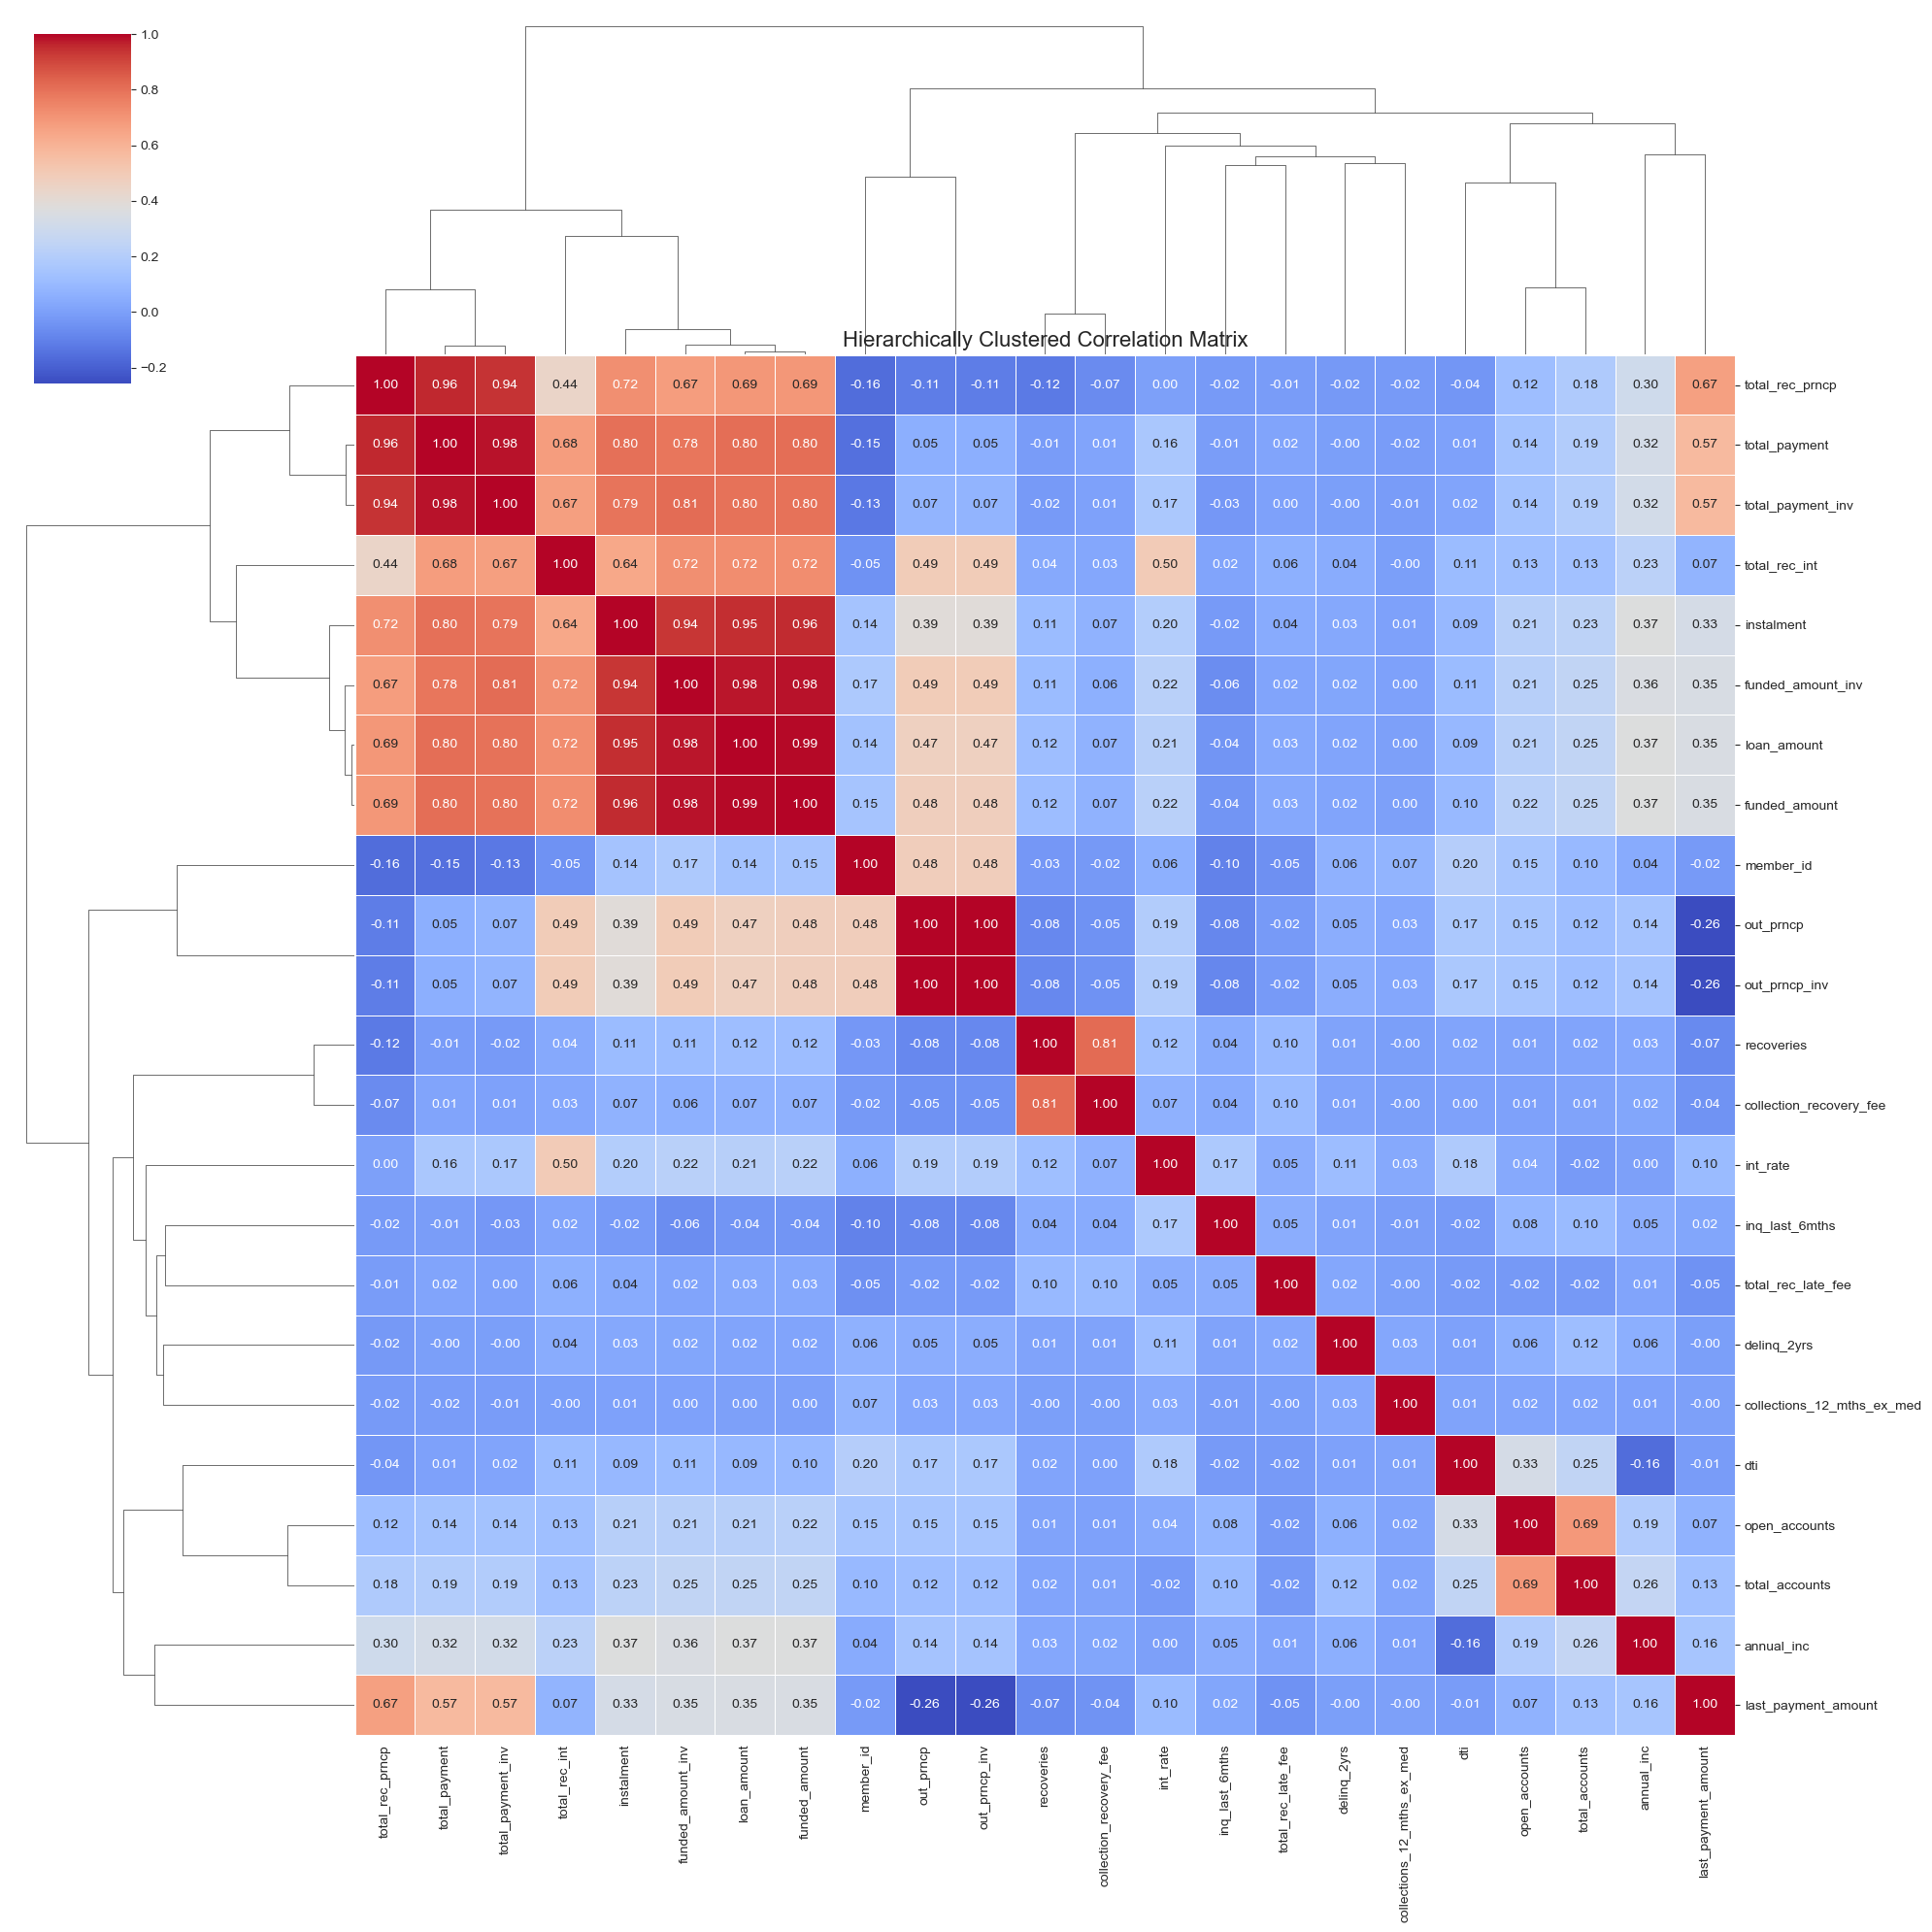

In [10]:
#Correlation heatmap
numeric_columns = df.select_dtypes(include=np.number)
numeric_columns = numeric_columns.dropna(axis=1, how='all')
numeric_columns = numeric_columns.loc[:, numeric_columns.std() > 0]
corr_matrix = numeric_columns.corr()

g = sns.clustermap(corr_matrix, 
                       cmap='coolwarm', 
                       annot=True, 
                       fmt='.2f', 
                       figsize=(20, 20),
                       linewidths=.5)
g.ax_heatmap.set_title('Hierarchically Clustered Correlation Matrix', fontsize=16, )

<h3> Risk and Portfolio Analysis </h3>

<h4> Loss Indicators </h4>

The first stage of understanding factors which influence the risk of loss for a loan. The following variables were identified as potential risk factors:

**Discrete Columns**:
- 'grade'
- 'term'
- 'employment_length'
- 'home_ownership'
- 'purpose'

**Continuous Columns**:
- 'annual_inc'
- 'int_rate'
- 'loan_amount'
- 'instalment'
- 'dti'

To start with, the discrete variables should be compared between subsets of the loan customers, we can compare between all loans; fully paid of loans which indicate succesful loans; charged and defaulted loans, which indicate unsuccesful loans and currently risky loans which can be compared to see if there are any patterns amongst customers who are behind on payments. By looking at all this we can get a clearer picture of what a risky loan looks like. To compare we can use pie charts and bar plots to gain a greater understanding of what the probability of the category is in each subset.

In [11]:
def discrete_value_risk_comparison(df: pd.DataFrame, column_name: str):
        paid_df = df[df['loan_status'] == 'Fully Paid'] # Fully Paid Loans
        charged_default_df = df[df['loan_status'].isin(['Charged Off','Default'])] # Charged off or defaulted loans
        risky_df = df[df['loan_status'].isin(['Late (31-120 days)','In Grace Period', 'Late (16-30 days)'])] # Risky Loans

        probabilities = df[column_name].value_counts(normalize=True).head(8)
        paid_probabilities = paid_df[column_name].value_counts(normalize=True).head(8)
        charged_default_probabilities = charged_default_df[column_name].value_counts(normalize=True).head(8)
        risky_probabilities = risky_df[column_name].value_counts(normalize=True).head(8)

        fig, axes = pyplot.subplots(nrows=2, ncols=4, figsize=(16, 8)) 

        axes[0, 0].set_title('All Loans')
        axes[0, 1].set_title('Fully Paid Loans')
        axes[0, 2].set_title('Charged off and Default Loans')
        axes[0, 3].set_title('Risky Loans')

        colour_palette = ['#a6cee3', '#fdbf6f', '#b2df8a', '#fb9a99', '#cab2d6', '#ffff99', '#1f78b4']

        axes[0, 0].pie(list(probabilities.values), labels=list(probabilities.index), colors=colour_palette, autopct='%1.1f%%', startangle=90, labeldistance = 1.1) 
        axes[0, 1].pie(list(paid_probabilities.values), labels=list(paid_probabilities.index), colors=colour_palette, autopct='%1.1f%%', startangle=90, labeldistance = 1.1) 
        axes[0, 2].pie(list(charged_default_probabilities.values), labels=list(charged_default_probabilities.index), colors=colour_palette, autopct='%1.1f%%', startangle=90, labeldistance = 1.1) 
        axes[0, 3].pie(list(risky_probabilities.values), labels=list(risky_probabilities.index), colors=colour_palette, autopct='%1.1f%%', startangle=90, labeldistance = 1.1) 

        sns.barplot(y=probabilities.index, x=probabilities.values, color='#a6cee3', ax=axes[1,0]) 
        sns.barplot(y=paid_probabilities.index, x=paid_probabilities.values, color='#a6cee3', ax=axes[1,1]) 
        sns.barplot(y=charged_default_probabilities.index, x=charged_default_probabilities.values, color='#a6cee3', ax=axes[1,2]) 
        sns.barplot(y=risky_probabilities.index, x=risky_probabilities.values, color='#a6cee3', ax=axes[1,3]) 

        pyplot.suptitle(column_name, fontsize='xx-large') # Overall Plot title
        pyplot.tight_layout()

        return pyplot.show()

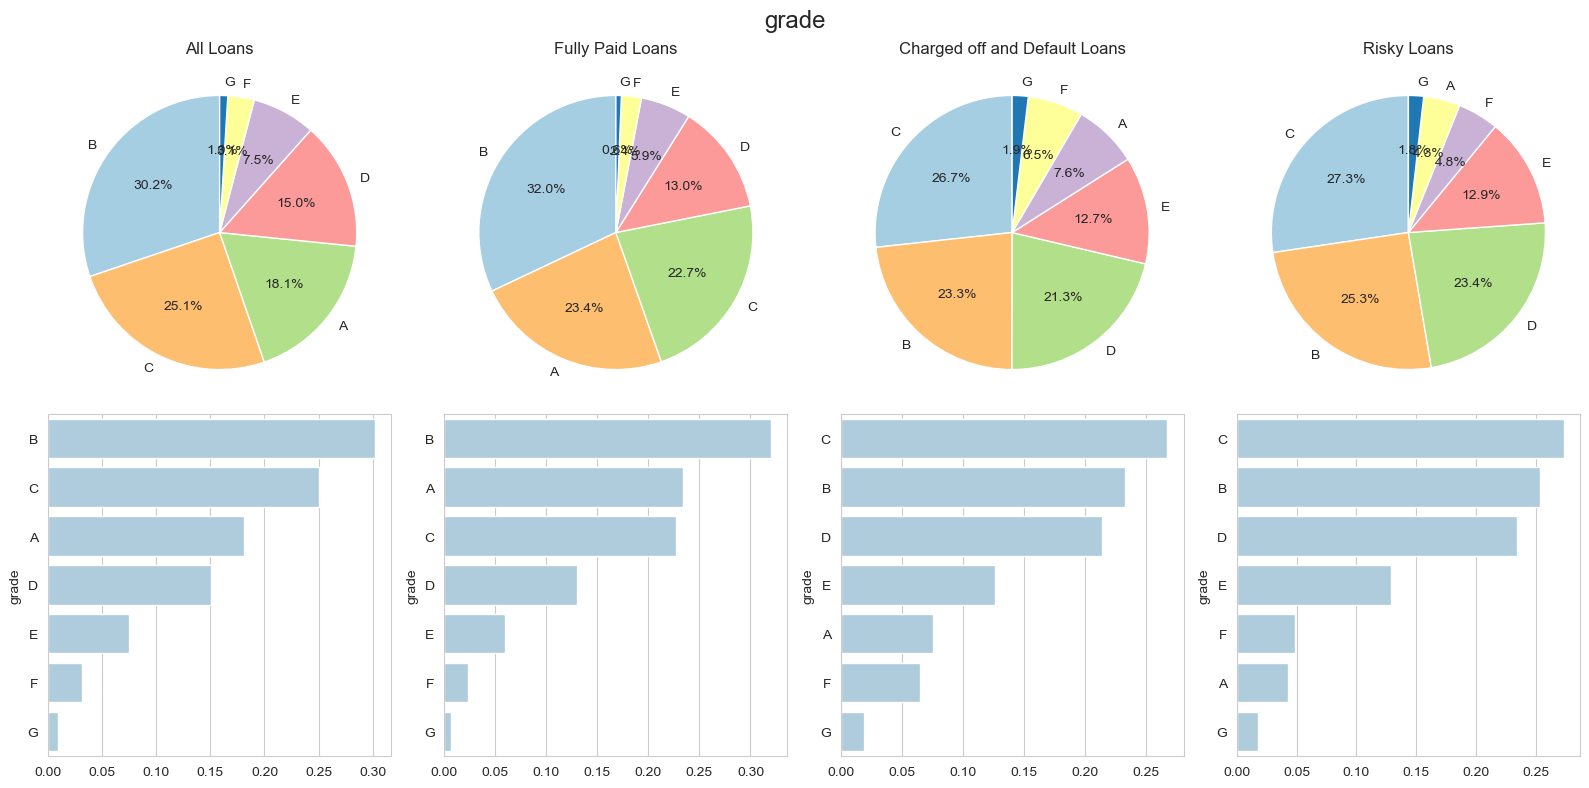

In [12]:
discrete_value_risk_comparison(df, 'grade')

From the 'grade' column it can be noted that in general grade 'B' is the most common in the average and fully paid off loan, however in riskier and unsucceful loans, 'C' happens to be the most common grade. Furthermore it can be noted that grade 'D' and 'E' is also a bit more prevelant in risky and unsuccesful loans compared to otherwise. But perhaps the most noteworthy conclusion is that grade 'A' loans are very safe since the appear most in succefully paid off loans and have around 20 % probability in general, however in risky and unsuccesful loans, this drops to around 5 %, indicating grade 'A' loans are unlikely to be charged off or defaulted. From this data the key conclusions that can be drawn are that grade 'C', 'D' and 'E' loans should be more carefully considered and grade 'A' loans are very safe.

Next we can consider how the 'term' of the loan may have an impact on the risk of loss.

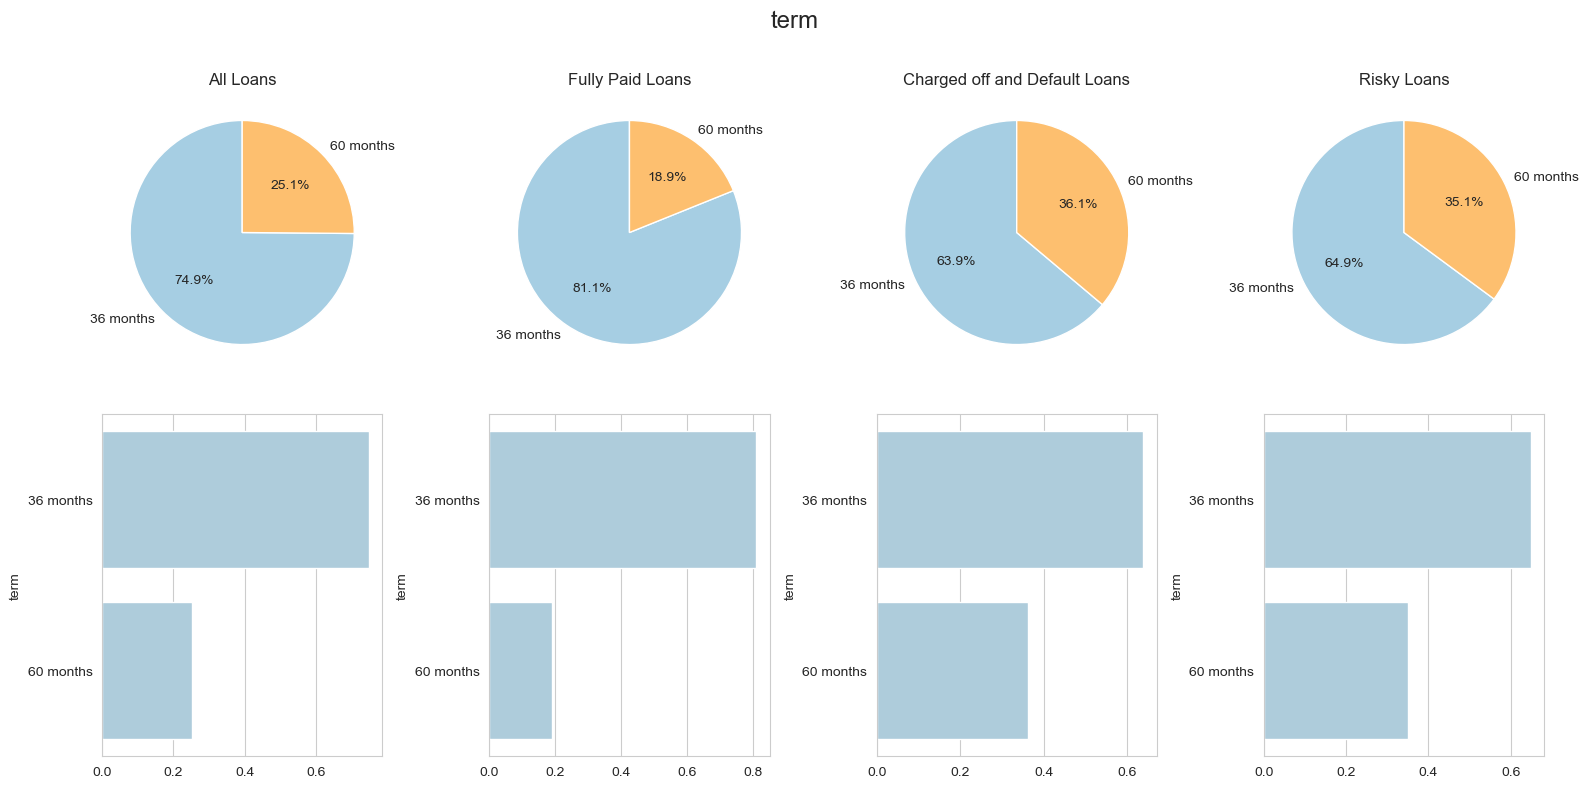

In [13]:
discrete_value_risk_comparison(df, 'term')

From this data we can determine that althogh '36 month' terms in all cases are the most common, '60 month' terms have a significantly higher chance of becoming a risky or unsucceful loan (over 50 % increase in number of unsuccesful compared to succesful '60 month' term loans), almost 15 % more loans are '60 month' terms in the unsuccesful categories. Therefore '60 month' terms should be issues with more caution.

We can now have a look at whether employment length has an impact on risk of loan.

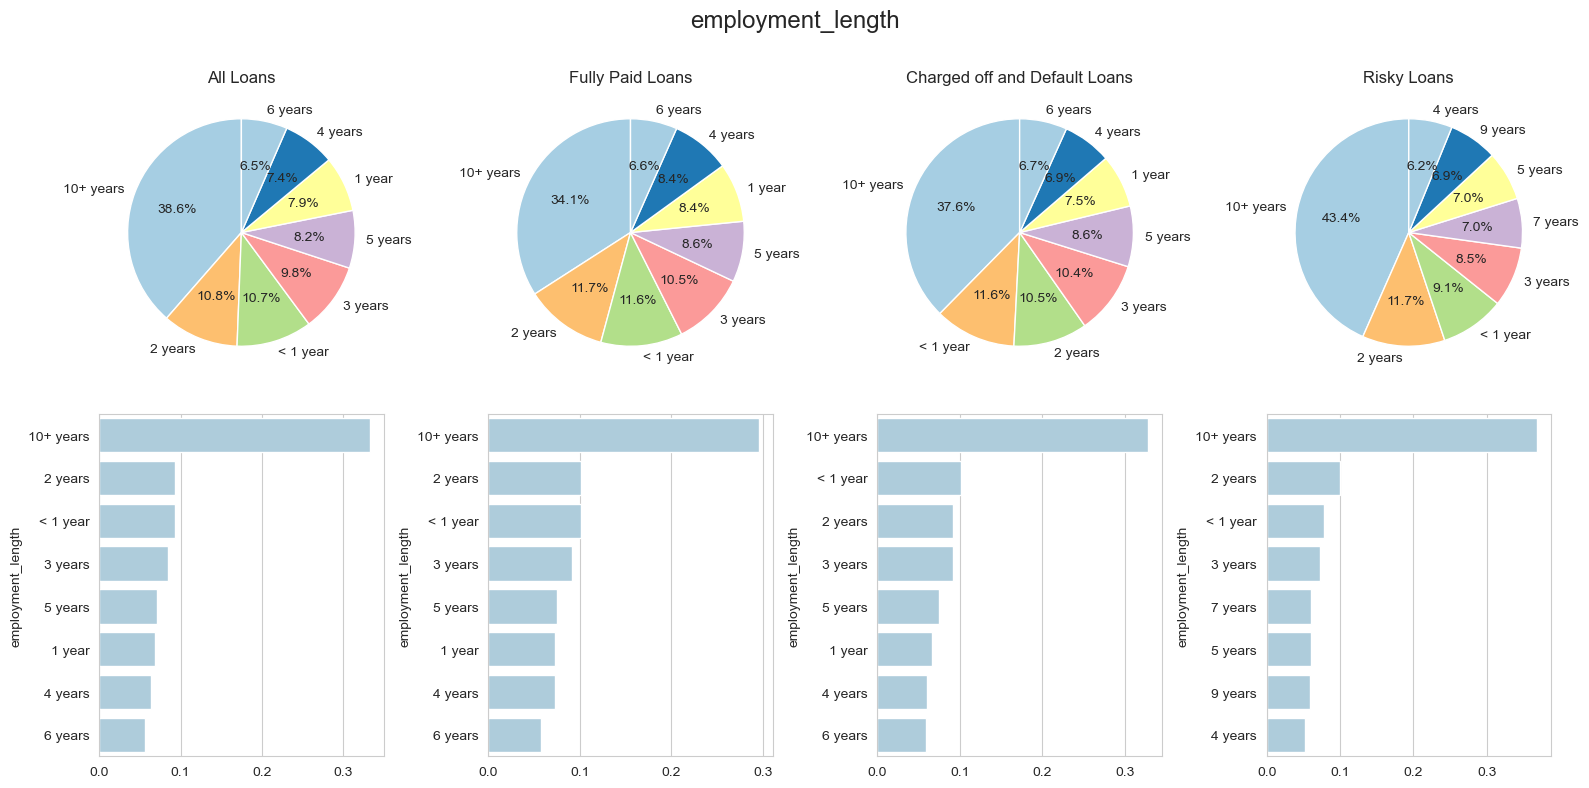

In [14]:
discrete_value_risk_comparison(df, 'employment_length')

'employment length' does not have a significant impact on risk of loan, '10+ years' is disproportionatly more prevelant in all categories but this is because it also represents a much larger range of years than the other categories. It could be slightly noted that if you ignore the '10+ years' category, that there is a very weak trend for lower employment lengths to be slightly more likely to have more prevelance in unsuccesful loans, but this can be considered statistically insignificant since this trend is very weak and can be somewhat seen in all subsets of the data.

'home_ownership' may also have a relationship with the probability of loss from a loan, as shown below.

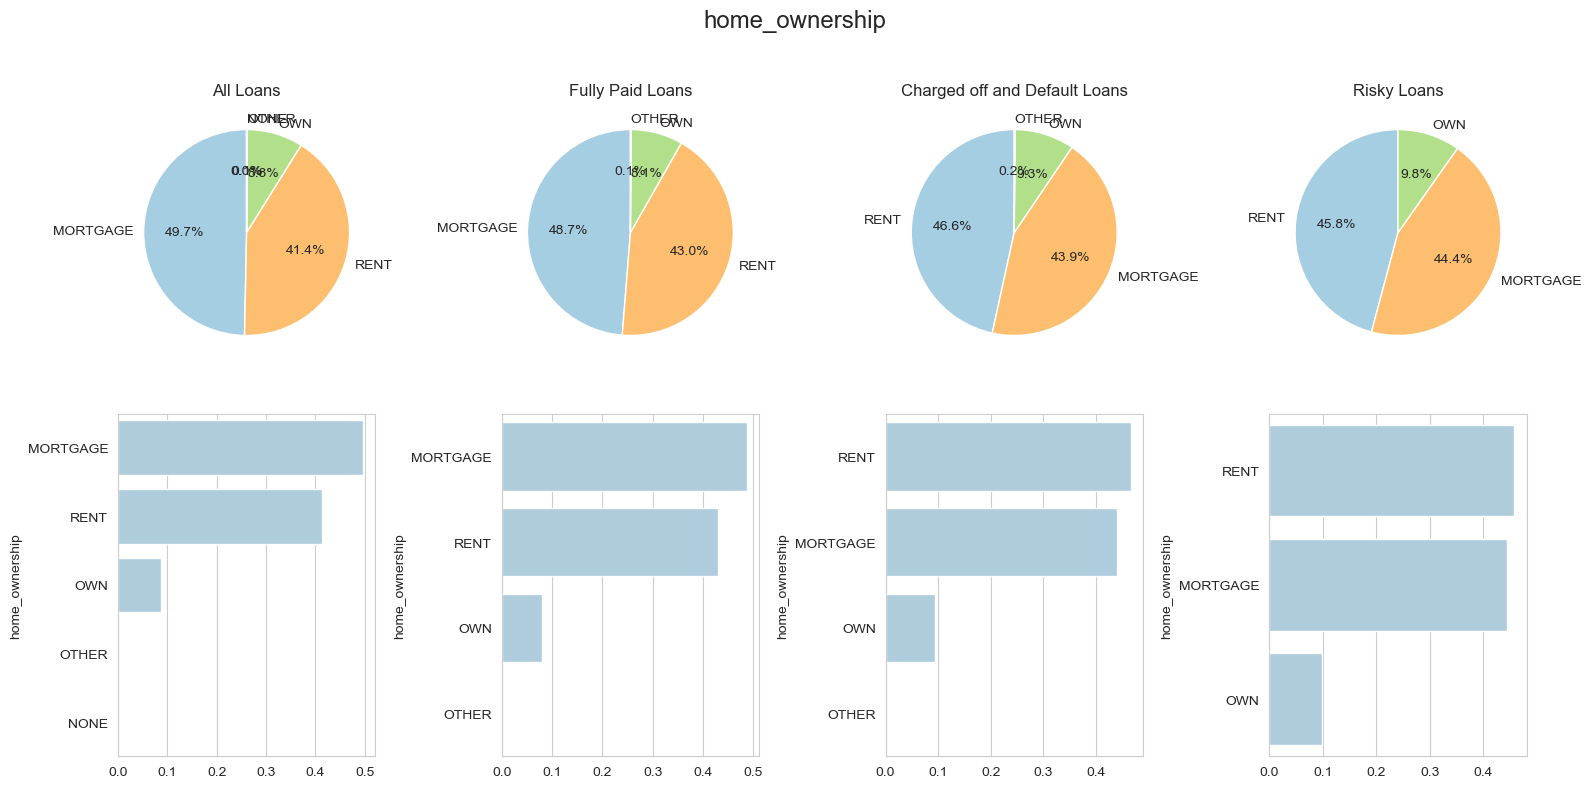

In [15]:
discrete_value_risk_comparison(df, 'home_ownership')

The most evident conclusion from this visualisation is that succesfully paid loans are more likely to be from customers with mortgages and unsuccesful and risky loans are more likely to be from customers that rent. renters make up roughly 3.5 % more of unsuccesful loans than succesful loans. customers that own their homes do not vary among the subsets of loans. This suggests that loans to renters should be issues with slightly more caution.

The final discrete column that can be analysed is the 'purpose' of the loan.

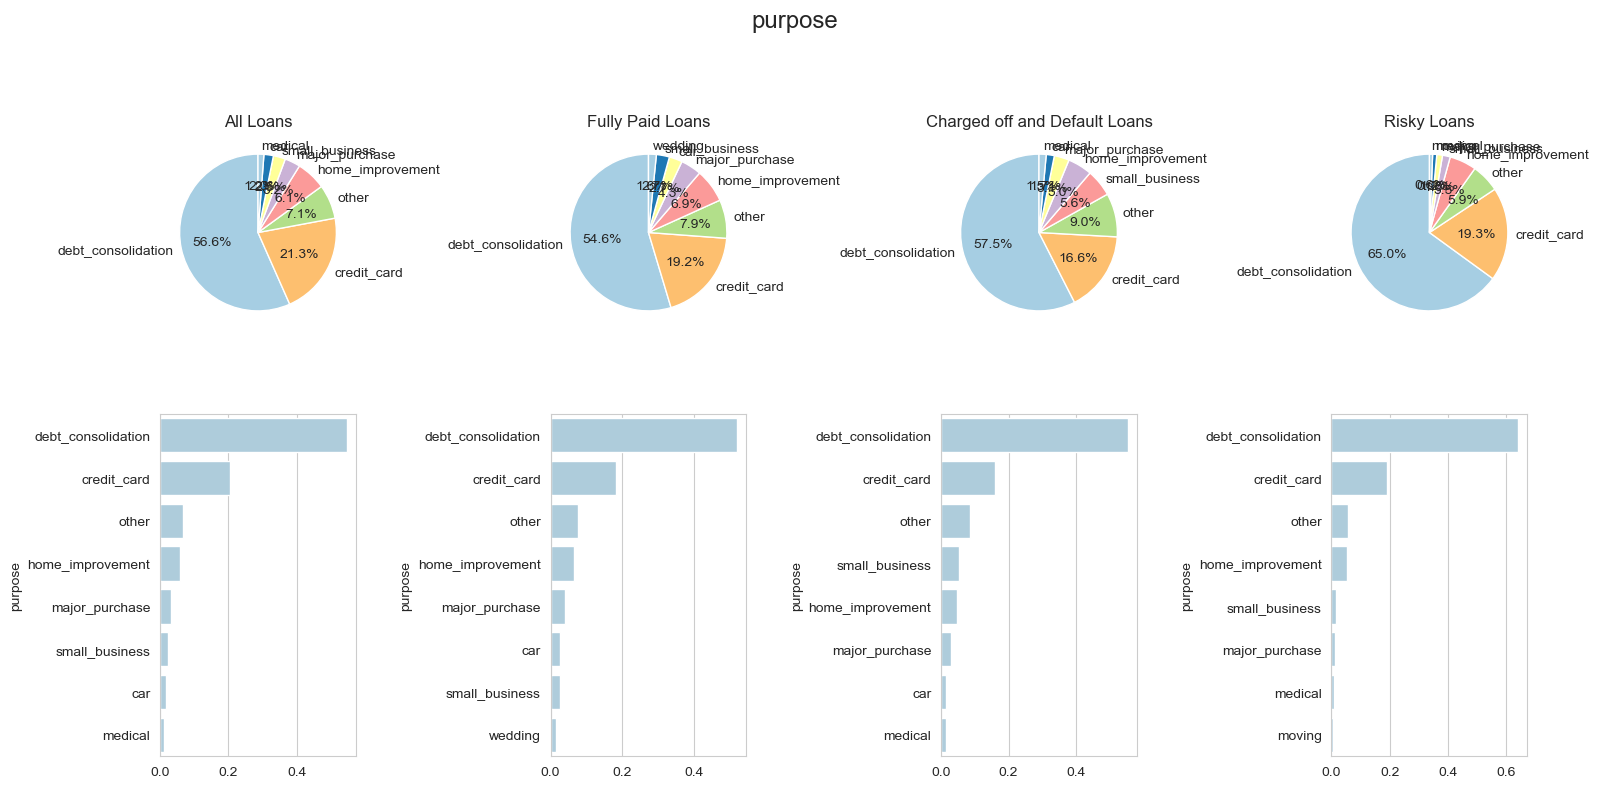

In [16]:
discrete_value_risk_comparison(df, 'purpose')

debt consolidation makes up a majority of the purpose for all loans, debt consolidation is significantly more likely to be a loan purpose for loans that are behind on payments or in the 'risky' subset. small business loans are also slightly more likely to be charged off or defaulted loans than other subsets. From this it can be stated that debt consolidation loans, although the majority, should still be observed and monitored carefully since they are more likely to be behind on payments, perhaps policies should be reviewed for loans issued for debt consolidation.

Now we can look at any trends or patterns in continuous data that highlight any variables that impact the risk of loss from a loan. For this analysis, a histogram will be analysed, to identify factors such as distribution and mean to understand any trends in specific subsets of loans. The first continuous variable that will be analysed is 'annual_inc'. 

In [17]:
def continuous_value_risk_comparison(DataFrame: pd.DataFrame, column_name: str, z_score_threshold: float=3):        
        def drop_outliers(Data_Frame: pd.DataFrame, column_name: str, z_score_threshold: float):
            mean = np.mean(Data_Frame[column_name]) 
            std = np.std(Data_Frame[column_name]) 
            z_scores = (Data_Frame[column_name] - mean) / std 
            abs_z_scores = pd.Series(abs(z_scores)) 
            mask = abs_z_scores < z_score_threshold
            Data_Frame = Data_Frame[mask]       
            return Data_Frame

        df = drop_outliers(DataFrame, column_name, z_score_threshold) 
        paid_df = df[df['loan_status'] == 'Fully Paid'] 
        charged_default_df = df[df['loan_status'].isin(['Charged Off','Default'])] 
        risky_df = df[df['loan_status'].isin(['Late (31-120 days)','In Grace Period', 'Late (16-30 days)'])]

        
        fig, axes = pyplot.subplots(nrows=1, ncols=4, figsize=(20, 5)) 

        axes[0].set_title(f'All Loans\nMean: {round(df[column_name].mean(),1)}')
        axes[1].set_title(f'Fully Paid Loans\nMean: {round(paid_df[column_name].mean(),1)}')
        axes[2].set_title(f'Charged off and Default Loans\nMean: {round(charged_default_df[column_name].mean(),1)}')
        axes[3].set_title(f'Risky Loans\nMean: {round(risky_df[column_name].mean(),1)}')

        colour_palette = ['#a6cee3', '#fdbf6f', '#b2df8a', '#fb9a99', '#cab2d6', '#ffff99', '#1f78b4']

        sns.histplot(data=df, x=column_name, kde=True, color='#a6cee3', ax=axes[0])
        sns.histplot(data=paid_df, x=column_name, kde=True, color='#a6cee3', ax=axes[1])
        sns.histplot(data=charged_default_df, x=column_name, kde=True, color='#a6cee3', ax=axes[2])
        sns.histplot(data=risky_df, x=column_name, kde=True, color='#a6cee3', ax=axes[3])
        

        axes[0].axvline(df[column_name].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Mean')
        axes[1].axvline(paid_df[column_name].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Mean')
        axes[2].axvline(charged_default_df[column_name].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Mean')
        axes[3].axvline(risky_df[column_name].mean(), color='blue', linestyle='dashed', linewidth=1.5, label='Mean')

        sns.despine(ax=axes[0])
        sns.despine(ax=axes[1])
        sns.despine(ax=axes[2])
        sns.despine(ax=axes[3])

        pyplot.suptitle(column_name, fontsize='xx-large') # Overall Plot title
        pyplot.tight_layout()

        return pyplot.show()

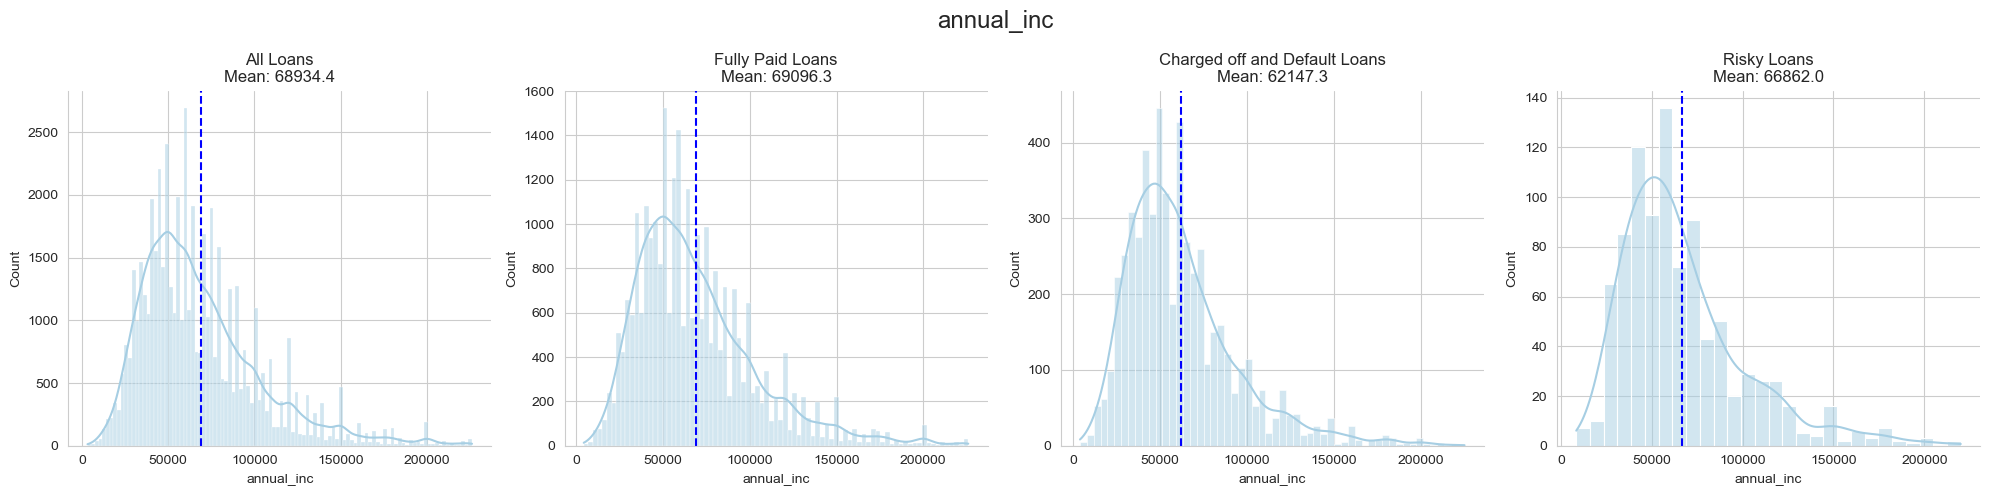

In [18]:
continuous_value_risk_comparison(df, 'annual_inc')

from the annual income visualisation, it can be noted that unsuccesful loans have 10 % lower average income than succesful and general loans. Risky loans, where people are behind on payments also have a slightly lower average income than other subsets. This highlights that the higher the income, generally there is less risk of the loan not being paid.

Next we can look at whether the loan interest rate has an impact on loan risk.

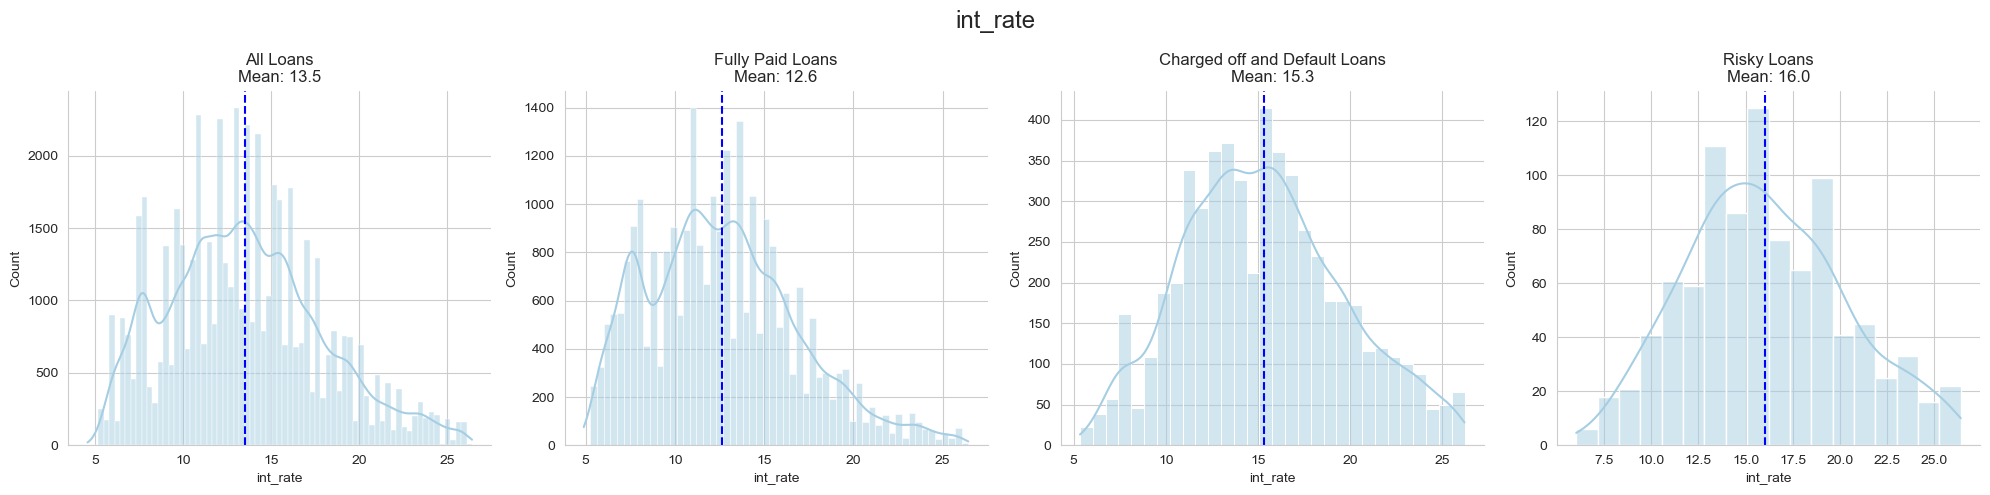

In [19]:
continuous_value_risk_comparison(df, 'int_rate')

There is a clear distinction between the plots for general and succesful loans and that of unsuccesful or delayed payment loans, the data is more positively skewed for lower interest rates in general and succesful loans (which have an even more pronouced skewness in fully paid loans), even a lower average interest rate of 12 % to 13 %. This data clearly suggests that higher interest rates have a much greater risk of not being paid. Succesfully paid off loans also tend to be those that are at a lower interest rate than the average loan.

Next we can consider whether the amount of loan issued has any relationship to the risk of default, being charged off or delayed.

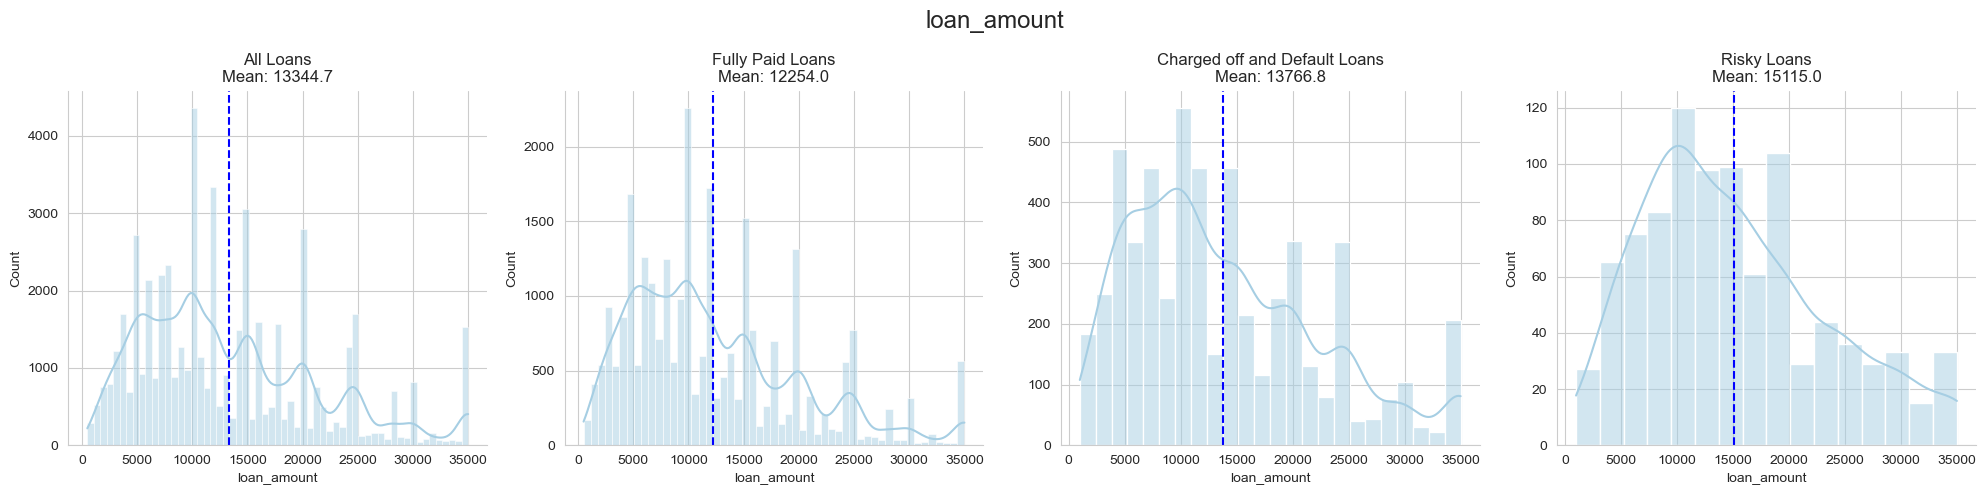

In [20]:
continuous_value_risk_comparison(df, 'loan_amount')

All loan amount data is slightly positive skewed, however in charged off and defaulted loans, as well as even more so in delayed payment loans, there are greater frequencies of loans at the higher values. Also the unsuccesful and riskier loans have a higher mean value, of 14k to 15k, than the general and succesful loans. It can also be seen that succesfully paid off loans have an evern lower average value than the average loan. This follows a similar pattern to interest rates where it can be concluded that lower loan amounts pose less risk.

Now we can take a look at whether the value of monthly instalment impacts the level of loan risk.

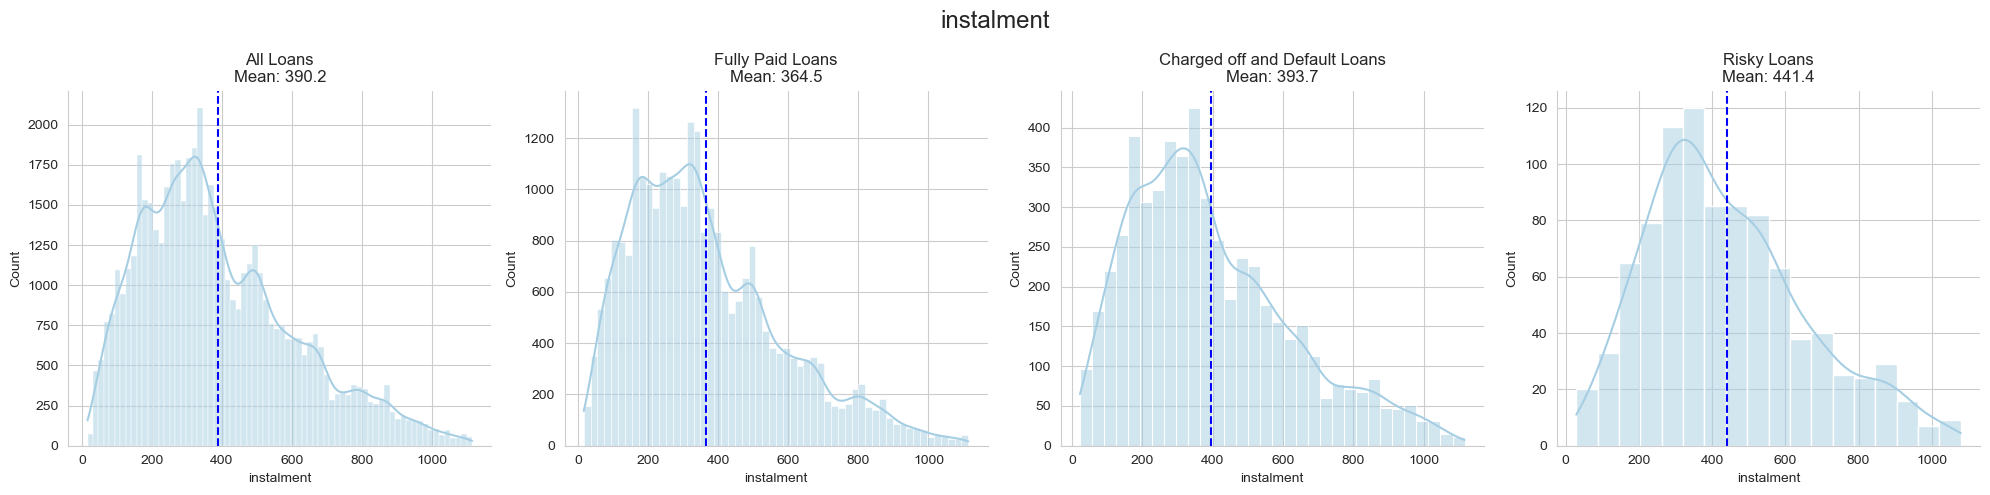

In [21]:
continuous_value_risk_comparison(df, 'instalment')

Again the data shows positive skew, particularly for general and paid off loans can be seen that delayed risky loans have slightly higher frequencies at larger monthly instalments. A similar trend to other variables can be seen here where unsuccesful loans have a higher average monthly amount (393) and succesfully paid off have a significantly lower monthly amount (360), loans that are currently behind on payments have a statistically significantly higher average monthly instalment of 440. This suggests that higher monthly instalments have a higher risk of being behind on payments, charged off or defaulted.

<h3> Current Status of Loans </h3>

To understand the current state of the payments.

To review 'Charged Off' loans will help gain a better understanding of loss to the company. A pie chart can be used to understand how many of the loans are 'Charged Off' and how much of the total funded amount was repaid for 'Charged Off' loans.

The Amount Paid before the loan was Charged Off : 37282284.3208195


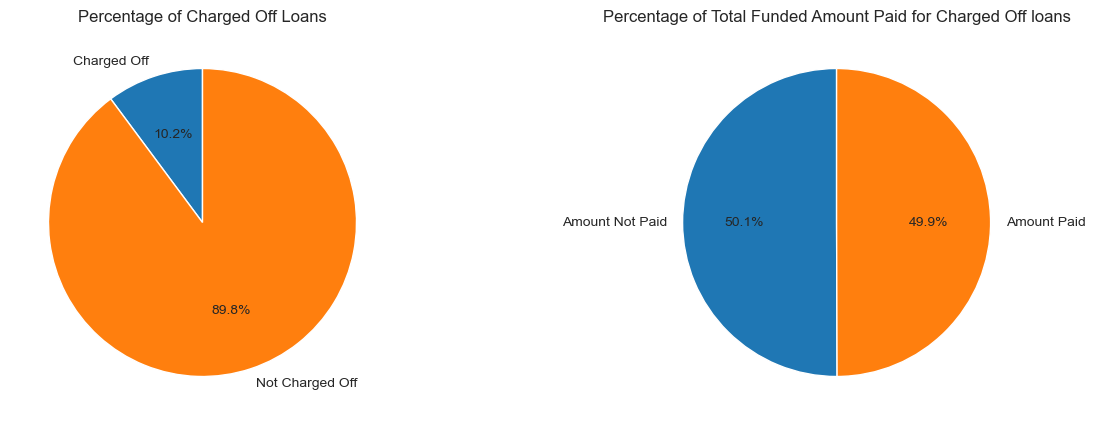

In [22]:
number_of_chg_off_loans = (df['loan_status'] == 'Charged Off').sum()
pct_chg_off = number_of_chg_off_loans* 100 / len(df) 

fig , axes = pyplot.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].pie(labels=['Charged Off', 'Not Charged Off'], x=[pct_chg_off, 100-pct_chg_off], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Percentage of Charged Off Loans')

funded_amounts_charged_off = df[df['loan_status']=='Charged Off']['funded_amount'].sum()
total_payment_charged_off = df[df['loan_status']=='Charged Off']['total_payment'].sum()
pct_amt_charged_off = 100 - ( total_payment_charged_off * 100 / funded_amounts_charged_off )

axes[1].pie(labels = ['Amount Not Paid', 'Amount Paid'], x=[pct_amt_charged_off, 100-pct_amt_charged_off], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage of Total Funded Amount Paid for Charged Off loans')

print(f'The Amount Paid before the loan was Charged Off : {total_payment_charged_off}')

The pie chart shows that 1 in every 10 loans issues is charged off. Here we can see roughly of half the funds given for these loans was actually paid before they were 'Charged Off'. A total of *37,282,284.32* was paid towards these loans.

To project the losses first we have to look at how much revenue each 'Charged Off' loan would have generated. Then we much consider how much total projected revenue was lost. This can be visualised in a bar chart amongst other variables such as the Total Revenue from loan payments, Total value of loans issued and total revenue from payments made before the loans were 'Charged Off'.


C:\Users\harsh\AppData\Local\Temp\ipykernel_44592\2919274854.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  charged_off_df['projected_loss'] = total_loan_amount - charged_off_df['total_payment']


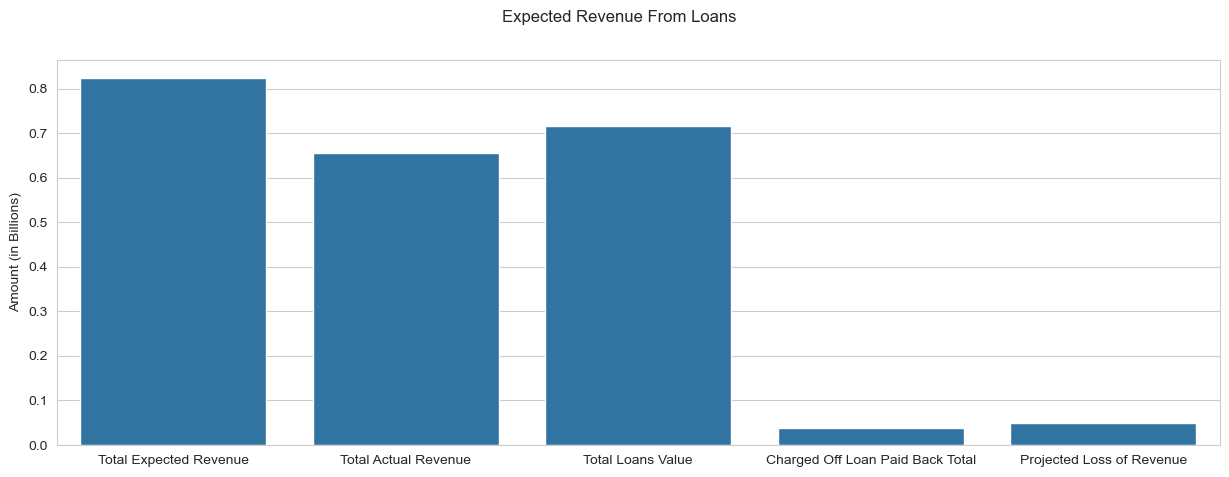

In [23]:
charged_off_df = df[df['loan_status']=='Charged Off'] 
total_loan_amount = charged_off_df['funded_amount'] + (charged_off_df['funded_amount'] * (charged_off_df['int_rate']) * 0.01) 
charged_off_df['projected_loss'] = total_loan_amount - charged_off_df['total_payment'] 
projected_loss = charged_off_df['projected_loss'].sum() 

categories = ['Total Expected Revenue', 'Total Actual Revenue', 'Total Loans Value', 'Charged Off Loan Paid Back Total', 'Projected Loss of Revenue']
total_expected_revenue = (df['loan_amount'] * (1 + (df['int_rate'] * 0.01))).sum() 
total_actual_revenue = df['total_payment'].sum()
loans_total = df['funded_amount'].sum()
data = [total_expected_revenue/1000000000, total_actual_revenue/1000000000, loans_total/1000000000, total_payment_charged_off/1000000000, projected_loss/1000000000] 

pyplot.figure(figsize=(15,5))
sns.barplot(x = categories, y = data)
pyplot.ylabel('Amount (in Billions)')
pyplot.suptitle('Expected Revenue From Loans')

pyplot.show()

As we can see the projected loss of revenue was greater than the actual revenue made on 'charged Off' loans, part of this may be due to the interest. This was a relatively small portion of the overall revenue the company has made. We can also see that the actual revenue the company expects to make is smaller than the expected revenue, in fact it is even smaller than the value of loans funded, so there is significant loss.

Next we can try to project the revenue that would be made for each monthly instalment of 'Charged Off' loans had they been paid off. The following bar chart shows a cumulative plot of cumulative revenue lost per month for 'charged off' loans if they had been continued being paid off.

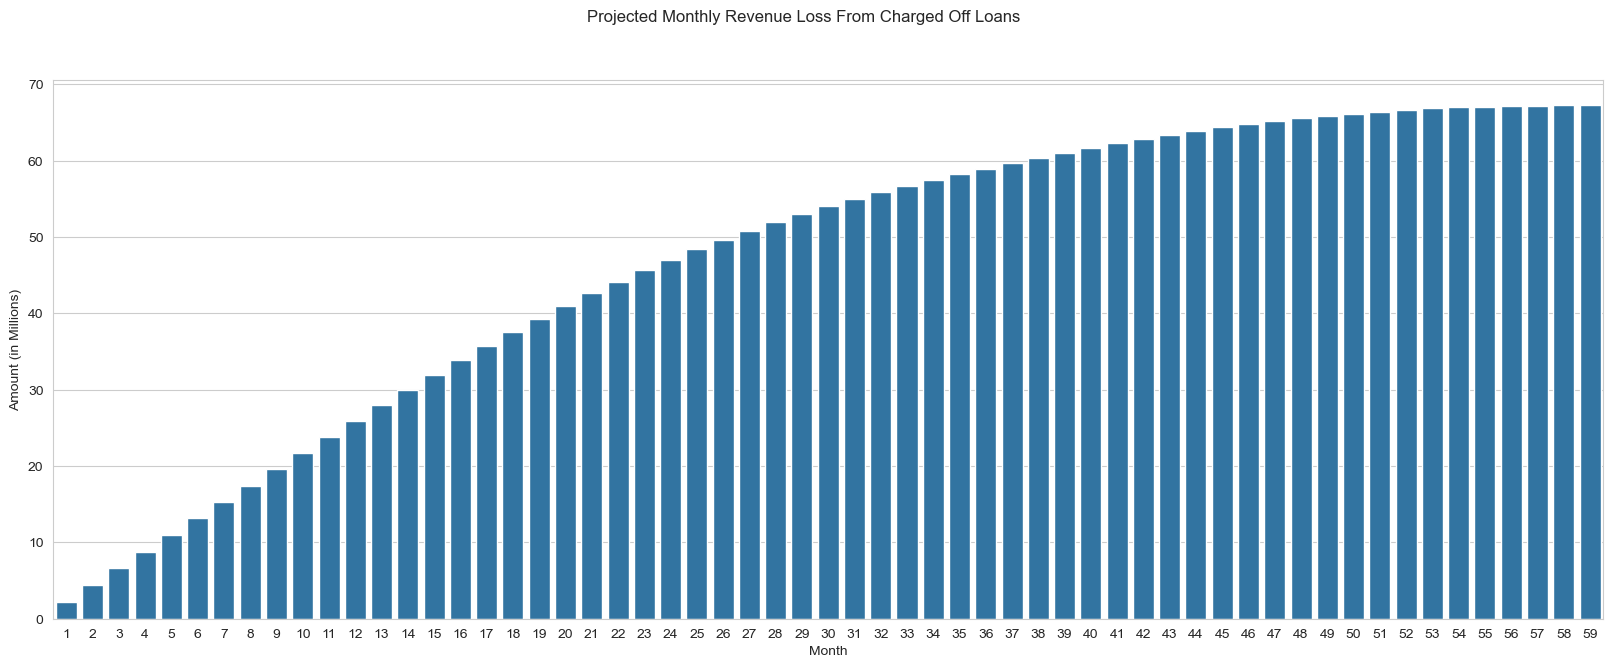

In [25]:
revenue_lost = revenue_lost_by_month(charged_off_df)
revenue_lost = [revenue/1000000 for revenue in revenue_lost]
pyplot.figure(figsize=(20,7))
sns.barplot(x = list(range(1, len(revenue_lost)+1)), y = revenue_lost)
pyplot.ylabel('Amount (in Millions)')
pyplot.xlabel('Month')
pyplot.suptitle('Projected Monthly Revenue Loss From Charged Off Loans')

pyplot.show()

From this visualisation it can be seen that the revenue lost each month decreases, causing the the growth in cumulative revenue lost to slow down. This is because each month there will be loans that complete their term, meaning less loans in total that need to be paid back with each month that passes. The total revenue lost after 59 months is just under 70 million.

### Possible Loss

Any loan with a 'loan_status' of *'Late (31-120 days)', 'In Grace Period'* or *'Late (16-30 days)'* can be considered a 'Risky' loan. To understand possible risk of loss, first we must consider how many of the total loans fall in this bracket as well as what percentage of all and current loans these 'Risky' loans consist of. This can be visualised with a pie chart.

The Number of Risky Loans: 951


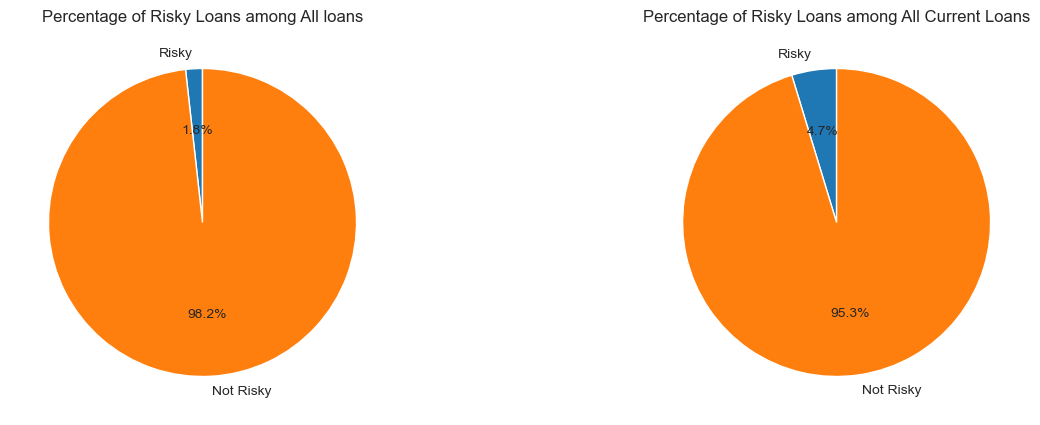

In [30]:
risky_status = ['Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'] 
risky_df = df[df['loan_status'].isin(risky_status)] 
current_df = df[df['loan_status'].isin(['Current','Late (31-120 days)','In Grace Period', 'Late (16-30 days)'])] 
risky_customers_sum = len(risky_df) 

pct_risky_all = risky_customers_sum* 100 / len(df)
pct_risky_curr = risky_customers_sum* 100 / len(current_df) 

fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].pie(labels=['Risky', 'Not Risky'], x=[pct_risky_all, 100-pct_risky_all], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Percentage of Risky Loans among All loans')

axes[1].pie(labels = ['Risky', 'Not Risky'], x=[pct_risky_curr, 100-pct_risky_curr], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Percentage of Risky Loans among All Current Loans')

print(f'The Number of Risky Loans: {risky_customers_sum}')

There are 951 'Risky' loans, and as we can see, they only represent roughly 2 % of all loans but represent roughly 5 % of all currently active loans. These should be considered further to understand the potential loss that can be incurred. To understand this the total revenue that would be lost must be projected if all risky loans became 'Charged Off'. This should then be visualised in a pie chart as a percentage of total expected revenue from 'Risky' loans if they are fully paid and as a percentage of total expected revenue from all loans.

In [27]:
def calculate_total_expected_revenue(DataFrame: pd.DataFrame):

        def calculate_total_revenue(row):
            if row["term"] == "36 months":  
                return (36 * row["instalment"])  
            elif row["term"] == "60 months":  
                return (60 * row["instalment"])

        DataFrame["total_revenue"] = DataFrame.apply(calculate_total_revenue, axis=1)
        total_expected_revenue = DataFrame["total_revenue"].sum()

        return total_expected_revenue

C:\Users\harsh\AppData\Local\Temp\ipykernel_44592\1745233793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame["total_revenue"] = DataFrame.apply(calculate_total_revenue, axis=1)
C:\Users\harsh\AppData\Local\Temp\ipykernel_44592\1745233793.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataFrame["total_revenue"] = DataFrame.apply(calculate_total_revenue, axis=1)


Text(0.5, 0.01, "If 'Risky' loans default, the company could lose an estimated 9,391,436.12")

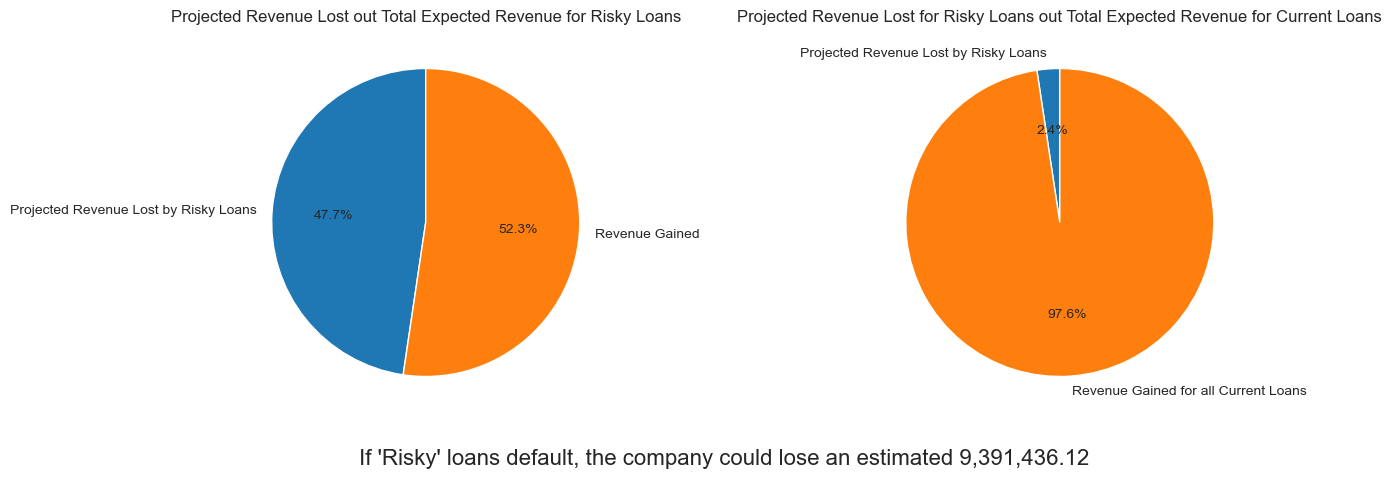

In [28]:
risky_projected_revenue_lost = revenue_lost_by_month(risky_df) 
risky_total_revenue_lost = risky_projected_revenue_lost[-1] 

risky_total_expected_revenue = calculate_total_expected_revenue(risky_df) 
current_total_expected_revenue = calculate_total_expected_revenue(current_df) 

pct_risky_totrisk = risky_total_revenue_lost* 100 / risky_total_expected_revenue
pct_risky_totcurr = risky_total_revenue_lost* 100 / current_total_expected_revenue 

fig, axes = pyplot.subplots(nrows=1, ncols=2, figsize=(15,5))

axes[0].pie(labels=['Projected Revenue Lost by Risky Loans', 'Revenue Gained'], x=[pct_risky_totrisk, 100 - pct_risky_totrisk], autopct='%1.1f%%', startangle=90)
axes[0].set_title('Projected Revenue Lost out Total Expected Revenue for Risky Loans')

axes[1].pie(labels = ['Projected Revenue Lost by Risky Loans', 'Revenue Gained for all Current Loans'], x=[pct_risky_totcurr, 100-pct_risky_totcurr], autopct='%1.1f%%', startangle=90)
axes[1].set_title('Projected Revenue Lost for Risky Loans out Total Expected Revenue for Current Loans')

fig.text(0.5, 0.01, f"If 'Risky' loans default, the company could lose an estimated {risky_total_revenue_lost:,.2f}", 
             ha='center', fontsize=16, wrap=True)

The potential loss from 'Risky' loans becoming 'Charged Off' is around 9 million loss in revenue. This represents roughly half of all Revenue that these loans would have been expected to generate. This also represents just over 4 % of all total revenue expected to be generated from all currently active loans. We can also consider the percentage of revenue that was lost to loans that were defaulted.

Text(0.5, 0.98, 'Projected Revenue Loss From Defaulted Loans')

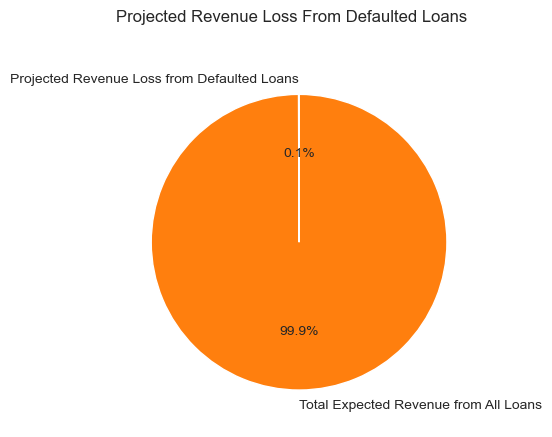

In [29]:
default_df = df[df['loan_status']=='Default'] 
default_projected_revenue_lost = revenue_lost_by_month(default_df) 
default_total_revenue_lost = default_projected_revenue_lost[-1]

pct_default_all = default_total_revenue_lost *100/ total_expected_revenue

pyplot.pie(labels=['Projected Revenue Loss from Defaulted Loans', 'Total Expected Revenue from All Loans'], x=[pct_default_all, 100-pct_default_all], autopct='%1.1f%%', startangle=90)
pyplot.suptitle('Projected Revenue Loss From Defaulted Loans')

defaulted loans have lost a much smaller share of total expected revenue than the potential loss from risky loans would, at around 0.1 %. This means the current risky loans should not be ignored.

### Conclusion

From the data analysis and visualisation it was discovered that the company faces a loss from loans that are not recovered, especially 'Charged Off' loans. Revenue over the next 6 months was also able to projected if all current loans are collected, considering the potential loss that the company faces from current risky loans. This visualisations also identified key variables such as the grade of the loan, income and dti of the customer and policy terms that can be used as indicators of loss, this information can be used to review and update the loan issuing and policy making process to minimise the loss to the company from unsuccesfully paid and risky loans.

Key insights:

- 90 % of all funded amounts have been recovered.
- 1 in every 10 loans is 'Charged Off'.
- under 50 % of 'Charged Off' loan funds issued were recovered, if these loans had been fully paid then they would have generated 70 million additional revenue.
- 5 % of current loans are deemed 'Risky' or behind on payments, which has a potential loss of 9 million.
- Grade 'A' loans are safest, grade 'D' and 'E' should be issued with caution.
- 60 month terms are riskier than average.
- Renters pose slightly greater risk than mortgage payers.
- 'Charged Off' and 'Defaulted' loan customers have a 10 % lower average income than fully paid off loans.
- The lower the interest rates, loan amounts and monthly instalment amounts, the lower the risk of loss.
- 'Dti' is positively correlated with risk of loss.

